# UCLA Admissions 
#### Data Source: UCLA's Logistic Regression in R tutorial <br/>
http://www.ats.ucla.edu/stat/r/dae/logit.htm

### The Data

Variable | Summary | Description | Type of Variable | Variable
---| ---| --- | ---
admit | admitted to UCLA or not | 1 admitted, 0 not admitted | binary | $Y$, Predictor, Target, Response, Dependent Variable
GRE | Graduate Record Examinations - standarized test |integers - range from 200 - 800 | discrete* | $X_0$, Predictors, Features, Independent Variable
GPA | Grade Point Average - summation rank of course grades  |floats with precision to the hundredths - range from 0.00 to 4.00 | continous | $X_1$, Predictors, Features, Independent Variable
prestige | rank of undergraduates' university | integers 4 to 1 (highest)| ordinal | $X_2$, $X_3$, $X_4$ Predictors, Features, Independent Variable

*although GRE score is technically discrete it will be treated as continuous

coefficients of model out put are the predictors <br/>
$y^*$ = $B_0$ + $B_1*GRE$ + $B_2*GPA$ + $B_3*prestige$ <br/>

then for logistic regression log of the coefficients <br/>
$p$ = $e^y$ / $e^y$ + 1<br/>

then $ln(p)$

In [98]:
# standard stuff
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [99]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


# Logistic Regression

#### Logistic Regression is used for making binary predictions 0 or 1, successs or fail, on or off. <br/>

### For prestige - make dummy variables 
the other columns GPA and GRE have continuous numbers. Prestige is categorical - it is also categorical ordinal meaning that the categories have a rank to them. <br/>


Two way Frequency Table on Prestige and Admit

In [100]:
admit_prestige = pd.crosstab(index = df.admit, columns = df.prestige, margins = True)

admit_prestige.index = ["rejected", "accepted", "Total"]

admit_prestige

prestige,1.0,2.0,3.0,4.0,All
rejected,28,95,93,55,271
accepted,33,53,28,12,126
Total,61,148,121,67,397


## Dummy Variables 
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

In [101]:
# use pandas api to create dummy variables
dummies = pd.get_dummies(df['prestige'], prefix = 'prestige')
df = df.join(dummies)
df.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0


In [102]:
keepCols = ['admit', 'gre', 'gpa', 'prestige_1.0', 'prestige_2.0', 'prestige_3.0']
df = df[keepCols]
df.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0
0,0,380.0,3.61,0.0,0.0,1.0
1,1,660.0,3.67,0.0,0.0,1.0
2,1,800.0,4.00,1.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,0.0
4,0,520.0,2.93,0.0,0.0,0.0


## Logistic Regression with sklearn api

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
lm = LogisticRegression()

In [109]:
X = df[df.columns[1:] ]
y = df.admit
X.head()

,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0
0,380.0,3.61,0.0,0.0,1.0
1,660.0,3.67,0.0,0.0,1.0
2,800.0,4.00,1.0,0.0,0.0
3,640.0,3.19,0.0,0.0,0.0
4,520.0,2.93,0.0,0.0,0.0


#### LogisticRegressionCV()
`CV` = Cross Validation <br/>
Validating the model by splitting the dataset using K-Folds

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html


In [10]:
# internally preforms k-folds

# cv : integer or cross-validation generator
#     The default cross-validation generator used is Stratified K-Folds.
#     If an integer is provided, then it is the number of folds used.

# cv = 5
modelCVa = LogisticRegressionCV(cv=5)
results5 = modelCVa.fit(X ,y)
results5.coef_

array([[ 0.00222171,  0.70905267,  1.46735347,  0.79753278,  0.15500038]])

In [11]:
CoefCVa = results5.coef_
CoefCV5 = pd.DataFrame(CoefCVa)
CoefCV5

,0,1,2,3,4
0,0.002222,0.709053,1.467353,0.797533,0.155


In [12]:
np.exp(CoefCV5)

,0,1,2,3,4
0,1.002224,2.032065,4.33774,2.220057,1.167658


In [13]:
# cv = 20
modelCVb = LogisticRegressionCV(cv=20)
results20 = modelCVb.fit(X ,y)
results20.coef_

array([[ 0.00218322,  0.65028041,  1.37995181,  0.72782847,  0.09247397]])

In [14]:
CoefCVb = results20.coef_
CoefCV20 = pd.DataFrame(CoefCVb)
CoefCV20

,0,1,2,3,4
0,0.002183,0.65028,1.379952,0.727828,0.092474


In [15]:
np.exp(CoefCV20)

,0,1,2,3,4
0,1.002186,1.916078,3.97471,2.070579,1.096885


In [106]:
from sklearn.cross_validation import cross_val_score

In [107]:
model = LogisticRegression()

In [108]:
scores = cross_val_score(model, X, y, cv=5)

# cv : int, cross-validation generator or an iterable, optional
#     Determines the cross-validation splitting strategy.
#     Possible inputs for cv are:

#     - None, to use the default 3-fold cross-validation, <--- default is 3 - good to know
#     - integer, to specify the number of folds. <----- we are doing 5
#     - An object to be used as a cross-validation generator.
#     - An iterable yielding train/test splits.

print scores
# accuracy score of each k-fold

[ 0.7037037   0.74683544  0.72151899  0.65822785  0.72151899]


In [52]:
from sklearn.metrics import accuracy_score

In [104]:
# from sklearn.cross_validation import accuracy_score
resultsAll = model.fit(X ,y)
allPreds = resultsAll.predict(X)
print accuracy_score(y,allPreds)

0.715365239295


accuracy score of each fold of the data is pretty much the same as the accuracy score of the whole data set so there is not bias within our data

#### LogisticRegression() 
Logistic Regression WITHOUT Cross Validation

In [110]:
model = LogisticRegression()
results1 = model.fit(X, y)
results1.coef_

array([[  1.58889206e-03,   1.84630312e-04,   1.16761197e+00,
          5.26947989e-01,  -3.80822680e-02]])

In [111]:
resultsA = results1.coef_
resultsa = pd.DataFrame(resultsA)
resultsa

,0,1,2,3,4
0,0.001589,0.000185,1.167612,0.526948,-0.038082


In [112]:
df["predictionCol"] = allPreds
df.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,predictionCol
0,0,380.0,3.61,0.0,0.0,1.0,0
1,1,660.0,3.67,0.0,0.0,1.0,0
2,1,800.0,4.00,1.0,0.0,0.0,1
3,1,640.0,3.19,0.0,0.0,0.0,0
4,0,520.0,2.93,0.0,0.0,0.0,0


In [113]:
model.fit(X,y)
# Logistic Regression fit on the whole dataset

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
print "check it out logit model Coefficients: {}".format(model.coef_)
print "The intercept: {}".format(model.intercept_)
print "The Average Admission rate is: {}".format(df.admit.mean())

check it out logit model Coefficients: [[ 0.00188106  0.22249322 -0.59783123]]
The intercept: [-1.19304963]
The Average Admission rate is: 0.317380352645


In [114]:
X.head(3)# the predictors

,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0
0,380.0,3.61,0.0,0.0,1.0
1,660.0,3.67,0.0,0.0,1.0
2,800.0,4.00,1.0,0.0,0.0


See what is going on with the Coefficients

In [115]:
coef = model.coef_
Coeff = pd.DataFrame(coef)
Coeff
# output model Coefficients
# predictor coefficients

,0,1,2,3,4
0,0.001589,0.000185,1.167612,0.526948,-0.038082


Formula 

In [116]:
np.exp(Coeff)
# exponent of the Coefficients
# exponent of the coefficients is the odds ratio of itself
# so column 2 is prestige = 
# but for prestige = 4 how do you know the odds increase or decrease since it was dropped -\n
# 

,0,1,2,3,4
0,1.00159,1.000185,3.214308,1.693755,0.962634


In [117]:
p = np.exp(Coeff)/(np.exp(Coeff) + 1)
p# this is probability from the formula e^y / e^y + 1 where y = B_0 and B_1(prestige1) +B_2(prestige2) etc  ??

,0,1,2,3,4
0,0.500397,0.500046,0.762713,0.628771,0.490481


In [118]:
np.log(p)# then this right?

,0,1,2,3,4
0,-0.692353,-0.693055,-0.270873,-0.463988,-0.71237


## coefficients and exp(coef)

predictors | sklearn coef | sklearn exp | sklearnCV=5 coef | sklearnCV=5 exp| sklearnCV=20 coef | sklearnCV=20 exp | Statsmodel coef | statsmodel exp | R tutorial coef | R tutorial exp
--- | --- | --- | --- | --- | --- | --- | --- | ---  |
gre        | 0.001589 | 1.00159  | 0.002222 | 1.002224 | 0.002183 |	1.002186 | 0.0022  |1.002221 | 0.0026  | 1.0023
gpa        | 0.000185 | 1.000185 | 0.709053 | 2.032065 | 0.65028  | 1.916078 | 0.7793  |2.180027 | 0.80404 | 2.2345
prestige=1 | 1.167612 | 3.214308 | 1.467353 | 4.33774  | 1.379952 | 3.97471  | -       |-        | -       | -
prestige=2 | 0.526948 | 1.693755 | 0.797533 | 2.220057 | 0.727828 | 2.070579 | -0.6801 |0.506548 | -0.67544| 0.5089
prestige=3 | -0.038082| 0.962634 | 0.155000 | 1.167658 | 0.092474 | 1.096885 | -1.3387 |0.262192 | -1.34020| 0.2618
prestige=4 | -        | -        |          |          |          |          | -1.5534 |0.211525 | -1.55146| 0.0185
intercept  | -2.070187|          |          |          |          |          | -3.8769 |0.020716 | -3.98998| 0.0185
		

In [119]:
import pandas as pd
# need to re-run these alot nice to keep around down here
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()
print df.shape

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
(397, 4)


In [9]:
X = df[df.columns[1:] ]
y = df.admit
# X and y from above - X and y stay the same - from the same data frame 

### Logistic Regression
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br/>
ok one more time - Logistic Regression <br/> 
Used for predicting binary outcomes <br/>
Overall we are trying to see if change in GPA, GRE, and prestige has an effect on being admitted into some hypothetical UCLA data. <br/>
the original data above > then make dummy variables on categorial data > make a model and make predictions <br/>
But really you should make a model of a subset of your data which becomes the "trained model" the predictions. Then you run the model on the stashed data and see how many you got right - what was the accuracy score of the model- how well can you say what predictor variables determine if admit = 1 or admit = 0. 

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from sklearn.metrics import accuracy_score
model = LogisticRegression()
# below anytime you see "model" you are running logistic regression from sklearn api (again same from above)

In [120]:
# Regular logistic regression from sklearn on Xdata and Y
resultsAll = model.fit(X ,y)
allPreds = resultsAll.predict(X)

a = zip(allPreds, y)
ab = pd.DataFrame(a, columns = ('admitTrue', 'admitPred'))
ab.head()
# cool now lets see our precictive powers!

,admitTrue,admitPred
0,0,0
1,0,1
2,1,1
3,0,1
4,0,0


In [124]:
print "Oh look the accuracy score of this model is: {}% good right? well lets see".format(metrics.accuracy_score(allPreds, y) *100) 
# accuracy score comparing y_Prediction to y_actual which is the admit column.  

Oh look the accuracy score of this model is: 70.0251889169% good right? well lets see


Acutal Totals for admit = 1 and admit = 0

In [67]:
ab.groupby("admitTrue").count()
# Totals of the the original data for admissions. 
# 354 were not admitted = 0
# 43 were admitted = 1

,admitPred
admitTrue,
0,354
1,43


Predicted Totals for admit = 1 and admit = 0

In [68]:
ab.groupby("admitPred").count()
# Totals of the predicted data for admissions
# 271 were predicted to not be admitted = 0
# 126 were predicted to be admitted = 1

,admitTrue
admitPred,
0,271
1,126


okok so how many of admit = 1 and admit = 0 did we get right? <br/>
* admit = 0 =  predicted 271 / real 354 = 76.5% 
* admit = 1 =  real 43 / predicted 126  = 34.1% <br/>

this does not mean anything actually - what we actually want to know how many times 0 was predicted and 0 was the true value and how many times 1 was predicted and 1 was the outcome

## Confusion Matrix aka Truth Table
### Crosstab Actual VS Model Prediction
Comparrison of the real data and the predicted 

In [66]:
ct = pd.crosstab(index = ab.admitTrue, columns = ab.admitPred, margins = True)
ct.index = ["Actual 0", "Predicted 1", "Total"]
ct 

admitPred,0,1,All
Actual 0,256,98,354
Predicted 1,15,28,43
Total,271,126,397


In [125]:
ct1 = pd.crosstab(ab.admitTrue, ab.admitPred)
ct1 #same thing with out the totals 

admitPred,0,1
admitTrue,,
0,256,104
1,15,22


- | - | -
-- | -- | --
Top Left |    256 | shows how many matches there were for admit = 0 and predicted admit = 0 
Bottom Right | 22  | shows how many matches there were for admit = 1 and predicted admit = 1 
Bottom Left |  15  | number of times it was predicted admit = 1 but acutally it admit = 0 
Top Right | 104 | number of times  admit = 0 but it was predicted that admit = 1, false hope

In [126]:
print metrics.classification_report(allPreds, y)

             precision    recall  f1-score   support

          0       0.94      0.71      0.81       360
          1       0.17      0.59      0.27        37

avg / total       0.87      0.70      0.76       397



precision score summs up above with the Crosstab Actual vs Predicted.  <br/>
For predicting 0 this model is awesome - 94% right <br/>
For actually predicting admit = 1 however this model predicts it right 17% of the time.  <br/>
Recall 
f1 score ----- <br/>
support is the totals of the true data. 

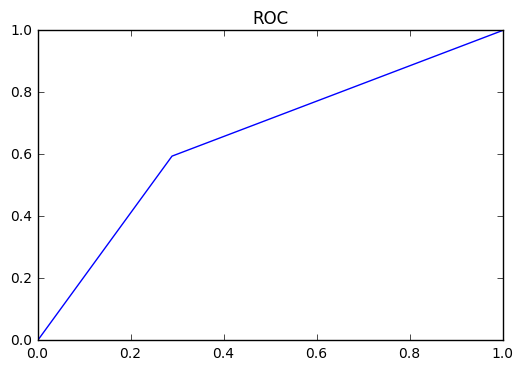

In [138]:
# ROC curve
# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True
ax = plt.subplot(111)
val = metrics.roc_curve(ab.admitTrue, ab.admitPred)
# not sure if I did this right ???
ax.plot(val[0], val[1])
ax.set(title = "ROC")

Is this better than guessing?
If the area under the ROC curve is greater than 50% then yes <br/>
50% is a diagonal line. The ROC curve IS greater than 50% so yes the model is better than guessing.